<a href="https://colab.research.google.com/github/revanthjavvaji/Fire_Detection/blob/main/Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import os
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR="/content/drive/MyDrive/Fire_Detection/Train_v1"

In [ ]:
VALIDATION_DIR = "/content/drive/MyDrive/Fire_Detection/Test_v1"

In [ ]:
datagen_train =ImageDataGenerator(rescale = 1./255,
                                zoom_range=0.25,
                                rotation_range=25,
                                horizontal_flip=True, vertical_flip=True,
                                shear_range=0.4)
train_generator = datagen_train.flow_from_directory(TRAINING_DIR,
                                         target_size=(250,250),
                                         batch_size = 32)

Found 4082 images belonging to 2 classes.


In [ ]:
datagen_validation =ImageDataGenerator(rescale = 1./255)
validation_generator = datagen_validation.flow_from_directory(VALIDATION_DIR,
                                         target_size=(250,250),
                                         batch_size = 32)

Found 1291 images belonging to 2 classes.


In [ ]:
#train_datagen = zip(pos_generator,neg_generator)
#training_generator = concatenate([positive_generator, negative_generator])

# Customized CNN Model

In [ ]:
import tensorflow
from tensorflow.keras import Sequential  
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPool2D  
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten

In [ ]:
model = Sequential([
    Conv2D(128,(5,5),strides=(3,3),activation='relu',input_shape=(250,250,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(5,5),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(5,5),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    #Dropout(0.3),
    Dense(1024, activation='relu'),
    #Dropout(0.35),
    Dense(1024, activation='relu'),
    #Dropout(0.35),
    Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 82, 82, 128)       9728      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 41, 41, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 64)        204864    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        51232     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)        

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
optimizer=Adam(learning_rate=0.001),
metrics=['acc'])

In [ ]:
history = model.fit(
train_generator,
epochs = 20,
validation_data = validation_generator)

Epoch 1/20
128/128 [==============================] - 2534s 20s/step - loss: 0.3932 - acc: 0.8408 - val_loss: 0.4160 - val_acc: 0.8861
Epoch 2/20
128/128 [==============================] - 104s 814ms/step - loss: 0.3090 - acc: 0.8934 - val_loss: 0.2510 - val_acc: 0.9094
Epoch 3/20
128/128 [==============================] - 106s 831ms/step - loss: 0.2282 - acc: 0.9226 - val_loss: 0.1550 - val_acc: 0.9396
Epoch 4/20
128/128 [==============================] - 105s 822ms/step - loss: 0.1982 - acc: 0.9277 - val_loss: 0.2644 - val_acc: 0.9256
Epoch 5/20
128/128 [==============================] - 107s 836ms/step - loss: 0.2005 - acc: 0.9290 - val_loss: 0.2061 - val_acc: 0.9280
Epoch 6/20
128/128 [==============================] - 105s 811ms/step - loss: 0.1873 - acc: 0.9314 - val_loss: 0.2449 - val_acc: 0.9318
Epoch 7/20
128/128 [==============================] - 107s 836ms/step - loss: 0.1641 - acc: 0.9429 - val_loss: 0.1554 - val_acc: 0.9481
Epoch 8/20
128/128 [=============================

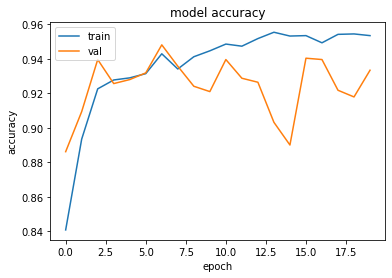

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import pickle
pickle.dump(model,open("model_cnn_v2.h5","wb"))

In [ ]:
import pickle
loaded_model=pickle.load(open("/content/model_cnn_v1.ckpt","rb"))

In [ ]:
from google.colab import files
import numpy as np

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(250, 250))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0]))

Saving istockphoto-153816520-612x612.jpg to istockphoto-153816520-612x612 (1).jpg
Saving download.jfif to download (1).jfif
Saving outdoor-fireplace-1585628569.jpg to outdoor-fireplace-1585628569 (1).jpg
1/1 [==============================] - 0s 24ms/step
1
1/1 [==============================] - 0s 21ms/step
1
1/1 [==============================] - 0s 22ms/step
1


In [ ]:
print(min(classes[0]))

0.00054158556


#Training Using Pre-Trained Model

##Vgg Model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

In [ ]:
input_tensor = Input(shape=(250, 250, 3))

In [ ]:
model_vgg= VGG16(include_top=False,
                 weights="imagenet",
                 input_tensor=input_tensor,
                 input_shape=(250,250,3)
                 #pooling="max"
                 )

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
mod_vgg=model_vgg.output
mod_vgg=MaxPool2D()(mod_vgg)
mod_vgg=Flatten()(mod_vgg)
#mod_vgg= Dense(1024, activation='relu')(mod_vgg)
#mod_vgg = Dropout(0.1)(mod_vgg)
mod_vgg = Dense(512, activation='relu')(mod_vgg)
#mod_vgg = Dropout(0.3)(mod_vgg)
output=Dense(2, activation='softmax')(mod_vgg)

In [ ]:
from tensorflow.keras.models import Model
mode_vgg= Model(inputs=model_vgg.input, outputs=output)

In [ ]:
for layer in model_vgg.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
mode_vgg.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
mode_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
history_vgg= mode_vgg.fit(
train_generator,
epochs = 20,
validation_data = validation_generator)

Epoch 1/20
134/134 [==============================] - 137s 993ms/step - loss: 0.3885 - accuracy: 0.8274 - val_loss: 0.8272 - val_accuracy: 0.6283
Epoch 2/20
134/134 [==============================] - 129s 967ms/step - loss: 0.2927 - accuracy: 0.8778 - val_loss: 0.5440 - val_accuracy: 0.7481
Epoch 3/20
134/134 [==============================] - 130s 968ms/step - loss: 0.2579 - accuracy: 0.8942 - val_loss: 0.4979 - val_accuracy: 0.7760
Epoch 4/20
134/134 [==============================] - 128s 960ms/step - loss: 0.2350 - accuracy: 0.9033 - val_loss: 0.5185 - val_accuracy: 0.7737
Epoch 5/20
134/134 [==============================] - 130s 974ms/step - loss: 0.2254 - accuracy: 0.9073 - val_loss: 0.5168 - val_accuracy: 0.7778
Epoch 6/20
134/134 [==============================] - 129s 966ms/step - loss: 0.2071 - accuracy: 0.9159 - val_loss: 0.5082 - val_accuracy: 0.7886
Epoch 7/20
134/134 [==============================] - 130s 974ms/step - loss: 0.2124 - accuracy: 0.9197 - val_loss: 0.5049 -

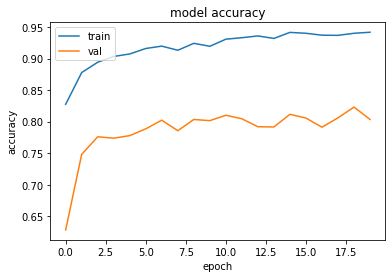

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import pickle
pickle.dump(mode_vgg,open("model_cnn_v2.ckpt","wb"))

In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
#Load the saved model
import pickle
model=pickle.load(open("/content/model_cnn_v1.ckpt","rb"))
#model = tf.keras.models.load_model(open('model_cnn_v1.h5'))
video = cv2.VideoCapture(0)
while True:
        _, frame = video.read()
#Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')
#Resizing into 224x224 because we trained the model with this image size.
        im = im.resize((250,250))
        img_array = image.img_to_array(im)
        img_array = np.expand_dims(img_array, axis=0) / 255
        probabilities = model.predict(img_array)[0]
        #Calling the predict method on model to predict 'fire' on the image
        prediction = np.argmax(probabilities)
        #if prediction is 0, which means there is fire in the frame.
        if prediction == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                print(probabilities[prediction])
        
        cv2.imshow("Capturing", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break

        
video.release()
cv2.destroyAllWindows()

AttributeError: ignored